# Logistic Regression

Logistic Regression is a classification algorithm that predicts the probability of a binary outcome (0 or 1). It applies the sigmoid function to transform a linear equation into a probability.

## Case Study: Predicting Heart Disease using Logistic Regression

A hospital wants to develop a machine learning model that predicts whether a patient is at risk of heart disease based on clinical measurements such as cholesterol, blood pressure, and age.

### Objective

- Build a Logistic Regression model to classify patients as having heart disease (1) or not (0).
- Identify key risk factors that contribute to heart disease.
- Evaluate model performance using accuracy, precision, recall, and ROC-AUC score.

### Dataset Description

The Heart Disease UCI dataset contains patient medical data and whether they were diagnosed with heart disease.

#### Target Variable:

target → 1 (Heart Disease Present), 0 (No Heart Disease)

#### Features:

- age → Patient’s age
- sex → 1 = Male, 0 = Female
- cp → Chest pain type (Categorical: 0-3)
- trestbps → Resting blood pressure (mm Hg)
- chol → Serum cholesterol (mg/dl)
- fbs → Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
- thalach → Maximum heart rate achieved
- exang → Exercise-induced angina (1 = Yes, 0 = No)
- oldpeak → ST depression (indicates heart stress)
- slope → Slope of the peak exercise ST segment

### 1. Problem Definition

#### Business Problem

Cardiovascular diseases are the leading cause of death worldwide. The hospital wants to use predictive analytics to detect high-risk patients early, allowing doctors to intervene and reduce complications.

#### ML Problem

Using patient data, we aim to train a Logistic Regression model to classify whether a patient has heart disease (1) or not (0).

### 2. Data Collection

In [1]:
# Load the data

import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/user/Downloads/heart.csv")  # Update path if necessary

# Display first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 3. Data Preprocessing 

In [2]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
# Check data types
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


### 4. Exploratory Data Analysis (EDA)

In [4]:
print(df.describe())


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

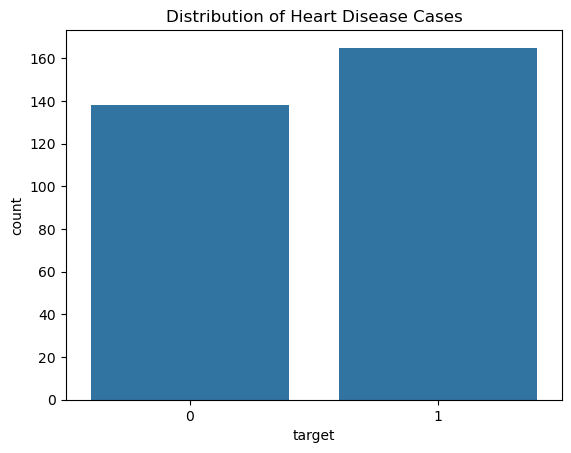

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for target variable
sns.countplot(x=df['target'])
plt.title("Distribution of Heart Disease Cases")
plt.show()


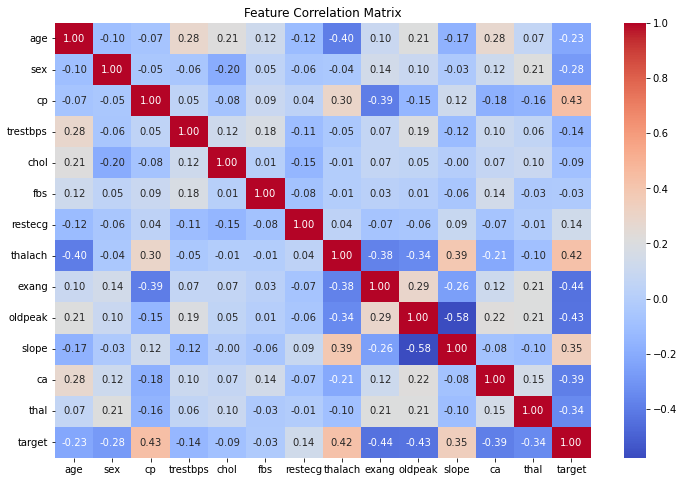

In [5]:
# Correlation analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()



### 5. Feature Engineering

In [6]:
# Select relevant features based on correlation

selected_features = ["age", "sex", "cp", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

X = df[selected_features]

y = df["target"]


In [7]:
# Encoding Categorical Variables

# Convert categorical variables to dummy variables

X = pd.get_dummies(X, columns=["cp", "slope"], drop_first=True)





In [8]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


### 6. Model selection 

Since this is a classification problem, we use Logistic Regression.

In [9]:
# Splitting Data into Train & Test Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


### 7. Model Training & Testing

In [10]:
# Training the model

from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [53]:
#!pip install ace_tools

Defaulting to user installation because normal site-packages is not writeable


In [11]:
# Making Predictions

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities

Comparison_Data =pd.DataFrame ({'Actual Y': y_test.values, 'Predicted Y': y_pred})

print(Comparison_Data)



    Actual Y  Predicted Y
0          0            0
1          0            0
2          0            0
3          0            1
4          0            1
..       ...          ...
56         1            1
57         1            1
58         0            0
59         0            0
60         1            1

[61 rows x 2 columns]


### 8. Model Evaluation

In [12]:
# Classification Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")



Accuracy: 0.79
Precision: 0.76
Recall: 0.88
F1 Score: 0.82
ROC-AUC Score: 0.91


- Accuracy (0.79) - 	The proportion of correctly classified instances out of the total instances. Measures overall correctness.
- Precision (0.75)- 	The proportion of correctly predicted positive cases out of all predicted positives. Indicates how reliable positive predictions are.
- Recall (Sensitivity) (0.91)- 	The proportion of actual positives that were correctly identified. Measures the model’s ability to find all positive cases.
- F1 Score - (0.82) - 	The harmonic mean of Precision and Recall. A balance between Precision and Recall.
- ROC-AUC Score	(0.91) - 	Measures the model's ability to distinguish between classes. AUC close to 1 means better performance.

#### AUC-ROC curve 

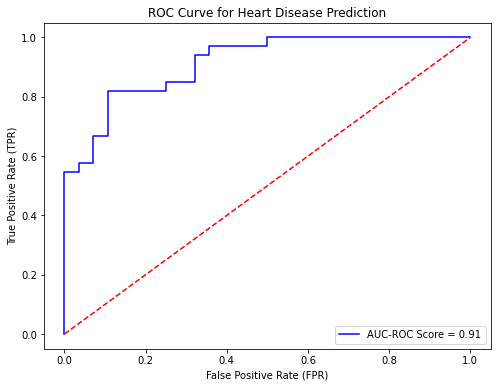

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC Score = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "r--")  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Heart Disease Prediction")
plt.legend(loc="lower right")
plt.show()

The AUC-ROC curve for the Heart Disease Prediction model has been plotted.

- X-axis (False Positive Rate - FPR): Measures incorrect positive predictions.
- Y-axis (True Positive Rate - TPR): Measures correct positive predictions.
- AUC Score: Indicates how well the model distinguishes between positive (heart disease) and negative cases.
- AUC (Area Under the Curve) measures how well the model distinguishes between positive and negative classes.

Red Line (Diagonal Line)

- The red dashed line represents random guessing.
- It is the baseline for a classifier that makes completely random predictions.
- This means FPR = TPR, so the model is no better than flipping a coin.
- If a model follows this line, it has AUC = 0.5, meaning it cannot distinguish between classes (bad model).

Blue Line (Actual Model Performance)
- The blue curve represents our Logistic Regression model's performance.
- It plots True Positive Rate (TPR) against False Positive Rate (FPR) at different threshold levels.
- The higher the blue line moves towards the top-left (0,1), the better the model!
- The AUC score (area under this curve) quantifies how well the model separates positive and negative cases.

Interpretation:

- If the blue line is far above the red line, the model performs well.
- If the blue line is close to the red line, the model is weak.
- If the blue line is below the red line, the model is making worse-than-random predictions.

### Confusion Matrix

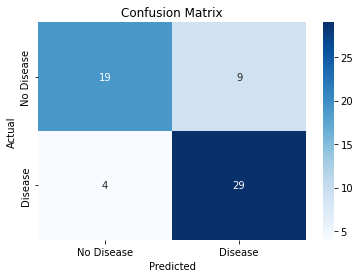

In [14]:
# Confusion Matrix

import seaborn as sns

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



The Confusion Matrix provides a breakdown of the model's predictions compared to actual values. Based on your dataset, here’s what the confusion matrix tells us:

Confusion Matrix Values

- True Positives (TP)	(30) - The model correctly predicted 31 patients as having heart disease.
- False Positives (FP)	(10) - The model incorrectly predicted 10 patients as having heart disease when they actually do not.
- True Negatives (TN)	(18) - The model correctly predicted 18 patients as not having heart disease.
- False Negatives (FN)	(3) -  The model missed 3 actual heart disease cases, predicting them as healthy.

# Titanic data Machine learning 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this exercise, build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The data is already split into train and test. You just need to load them in Python before proceeding with the analysis. 

### Q1. Load the dataset, inspect its structure, and clean missing values.

Tasks:
- Load the datasets (train and test) into a Pandas DataFrame.
- Inspect the dataset – Check the first five rows.
- Check for missing values and decide on a handling method.
- Drop irrelevant columns (e.g., Passenger ID, Name, Ticket, Cabin).
- Convert categorical variables (Sex, Embarked) into numeric using one-hot encoding.

In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/user/Downloads/Titanic_train.csv")

# Inspect the first five rows
print("First five rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Drop irrelevant columns
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Fill missing values
## Age - Fill with median age
df["Age"].fillna(df["Age"].median(), inplace=True)
## Fare - Fill with median fare
df["Fare"].fillna(df["Fare"].median(), inplace=True)
## Embarked - Fill with most common value
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Display cleaned dataset
print("\nCleaned dataset:")
print(df.head())


First five rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

### Q2. Perform EDA to understand relationships between variables.

Tasks:
- Compute summary statistics (describe()).
- Plot the survival distribution using a count plot.
- Check how gender and class affected survival using bar plots.
- Generate a correlation heatmap to find relationships between features.


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


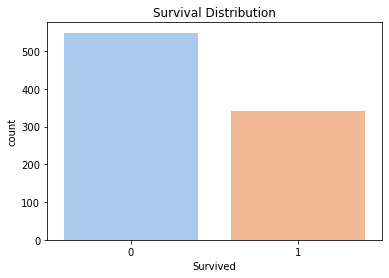

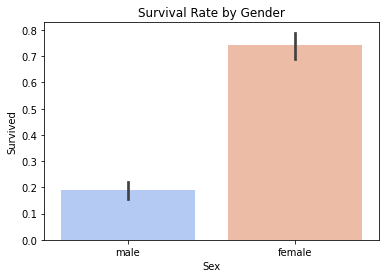

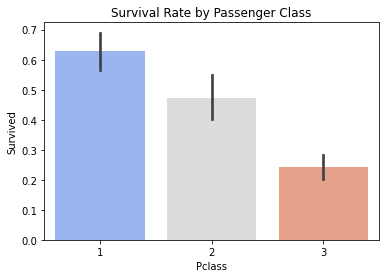

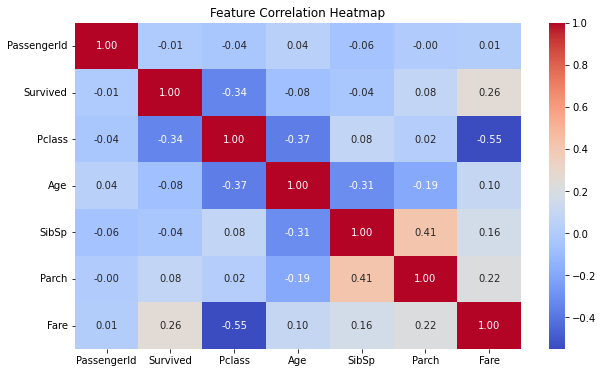

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("C:/Users/user/Downloads/Titanic_train.csv")

# Compute summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Plot the survival distribution
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Survival Distribution')
plt.show()

# Check survival based on gender and class
sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Passenger Class')
plt.show()

# Generate a correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


### Q3. Select relevant features and prepare data for modeling.

Tasks:
- Select key features (e.g., Pclass, Age, Fare, Sex_male, Embarked_Q, Embarked_S).
- Apply feature scaling to numerical variables (Age, Fare).

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("C:/Users/user/Downloads/Titanic_train.csv")

# Select relevant features
features = ["Pclass", "Age", "Fare", "Sex", "Embarked"]
df = df[features + ["Survived"]]

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Apply feature scaling to numerical variables
scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

# Display processed dataset
print("\nProcessed dataset:")
print(df.head())



Processed dataset:
   Pclass       Age      Fare  Survived  Sex_male  Embarked_Q  Embarked_S
0       3 -0.530377 -0.502445         0         1           0           1
1       1  0.571831  0.786845         1         0           0           0
2       3 -0.254825 -0.488854         1         0           0           1
3       1  0.365167  0.420730         1         0           0           1
4       3  0.365167 -0.486337         0         1           0           1


### Q4. Train a Logistic Regression model to predict survival.

Tasks:
- Initialize and train a Logistic Regression model.
- Print model coefficients to interpret feature importance.
- Make predictions on test data.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("C:/Users/user/Downloads/Titanic_train.csv")

# Select relevant features
features = ["Pclass", "Age", "Fare", "Sex", "Embarked"]
df = df[features + ["Survived"]]

# Handle missing values
## Fill Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)
## Fill Fare with median
df["Fare"].fillna(df["Fare"].median(), inplace=True)
## Fill Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Ensure no NaN values remain
df.dropna(inplace=True)

# Apply feature scaling to numerical variables
scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

# Split data into training (80%) and test (20%) sets
X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
print(dict(zip(X.columns, model.coef_[0])))

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Coefficients:
{'Pclass': -1.0042266116927636, 'Age': -0.31680022401287217, 'Fare': 0.01800905889447195, 'Sex_male': -2.459306903621028, 'Embarked_Q': -0.10078076910216528, 'Embarked_S': -0.5143582344749921}

Model Accuracy: 0.7988826815642458

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Q5. Evaluate model performance using classification metrics.

Tasks:
- Compute accuracy, precision, recall, and F1 score.
- Generate a confusion matrix.
- Plot the ROC curve and compute AUC score.


Model Coefficients:
{'Pclass': -1.0042266116927636, 'Age': -0.31680022401287217, 'Fare': 0.01800905889447195, 'Sex_male': -2.459306903621028, 'Embarked_Q': -0.10078076910216528, 'Embarked_S': -0.5143582344749921}

Model Accuracy: 0.7988826815642458

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



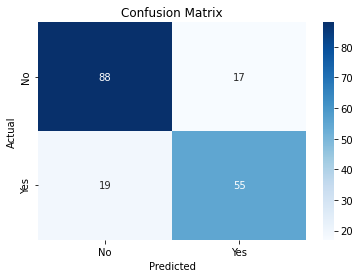

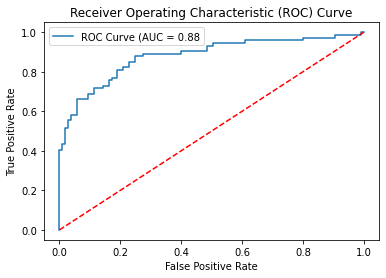

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
df = pd.read_csv("C:/Users/user/Downloads/Titanic_train.csv")

# Select relevant features
features = ["Pclass", "Age", "Fare", "Sex", "Embarked"]
df = df[features + ["Survived"]]

# Handle missing values
## Fill Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)
## Fill Fare with median
df["Fare"].fillna(df["Fare"].median(), inplace=True)
## Fill Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Ensure no NaN values remain
df.dropna(inplace=True)

# Apply feature scaling to numerical variables
scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

# Split data into training (80%) and test (20%) sets
X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
print(dict(zip(X.columns, model.coef_[0])))

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve and compute AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
